### Within this Notebook, consist of the various big data analysis made for the course Big Data

#### Table of Content

1. top 10 US Republicans/Democrats Politician that has the most tweets and also their most used words
2. Comparison between the amount of tweets done by the Republican and Democrate party in the house of representative
3. Top 10 most used words by the Republican/Democrats party
4. Tweet usage done within a certain critical time period in politics

In [38]:
import pandas as pd
import numpy as np
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### top 10 US Republicans/Democrats Politician that has the most tweets and also their most used words

In [39]:
df = pd.read_csv('tweet_per_user.csv')
df = df.sort_values(by=['tweet count'], ascending=False)

top_10_most_tweets_politicians = df.head(10)
df

,username,tweet count
376,Steny_Hoyer,21650
375,Frank_Pallone,19827
374,Pramila_Jayapal,18394
373,Donald_Beyer,16763
372,David_Cicilline,16024
...,...,...
4,Jake_Ellzey,140
3,Brad_Finstad,131
2,Joe_Sempolinski,81
1,Connie_Conway,73


<AxesSubplot:xlabel='username'>

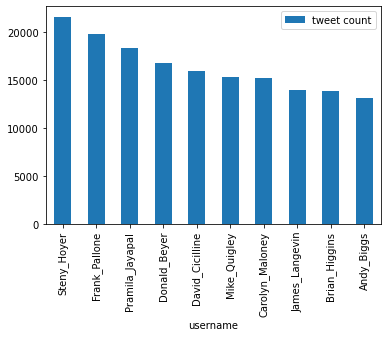

In [40]:
top_10_most_tweets_politicians

top_10_most_tweets_politicians.plot(kind='bar', y='tweet count', x="username")

Wordcloud of the 50 most used words by Democrats and Republicans

today 56907
us 41987
great 41271
american 36430
house 36112
president 31961
bill 30023
thank 29885
americans 29766
biden 28857
people 28456
border 28355
work 28231
day 26926
act 26722
time 26333
new 25956
congress 25715
im 24970
democrats 24095
support 23172
must 22927
need 22695
help 21868
week 21269
proud 20739
one 20073
country 20052
last 19815
america 18910
national 18714
thanks 18695
get 17926
families 17584
years 17501
tax 17445
office 17388
would 17183
state 17115
energy 17054
see 17051
year 16998
first 16993
happy 16488
here 16313
jobs 16302
health 16234
read 16093
service 16057
continue 15966
today 118246
us 81402
act 77222
must 73660
health 69981
need 67644
work 65992
people 63794
help 62074
im 61515
families 59487
house 57625
congress 57455
americans 54813
time 54154
new 53255
bill 53247
support 52153
american 51483
proud 50600
care 50481
great 48289
community 48251
day 47890
make 46476
get 45862
thank 42800
trump 42788
president 42708
country 40800
one 40577
working 38437
c

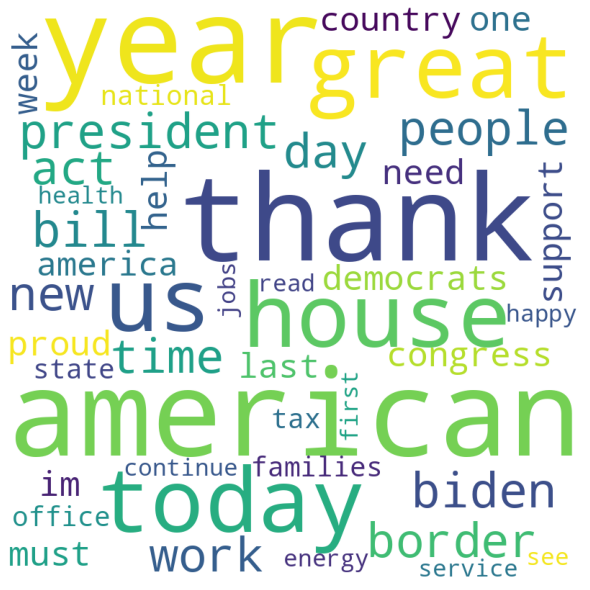

In [80]:
# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv('data_preprocessed/3_word_count_per_party.csv')
df = df.dropna()

df2 = df.sort_values(by=['wordcount'], ascending=False)
Republican_word_count = df2[df2['party'].str.contains("Republican")]
Democrat_word_count = df2[df2['party'].str.contains("Democrat")]


# seperate republican and democrat word counts
Republican_word_count = Republican_word_count.sort_values(by=['wordcount'], ascending=False)
Democrat_word_count = Democrat_word_count.sort_values(by=['wordcount'], ascending=False)

# take the top 50
top_50_Republican_word_count = Republican_word_count.head(50)
top_50_Democrat_word_count = Democrat_word_count.head(50)
top_50_Republican_word_count

#words processing
top_50_Republican_words = []
top_50_Democrat_words = []

for index, row in top_50_Republican_word_count.iterrows():
    print(row['word'], row['wordcount'])
    top_50_Republican_words.append(row['word'])

republican_words = ''
republican_words += " ".join(top_50_Republican_words)+" "

for index, row in top_50_Democrat_word_count.iterrows():
    print(row['word'], row['wordcount'])
    top_50_Democrat_words.append(row['word'])

Democrat_words = ''
Democrat_words += " ".join(top_50_Democrat_words)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(republican_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

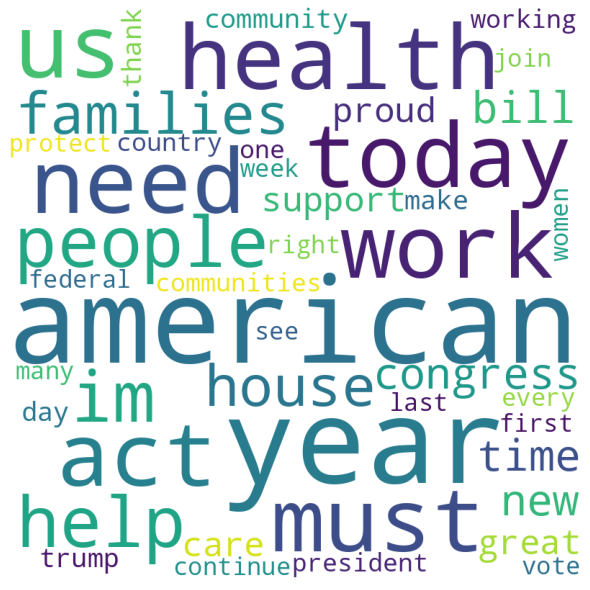

In [81]:
'''
Republican Wordcloud generator
'''
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(Democrat_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Pie Chart for the tweet frequency of each parties overall

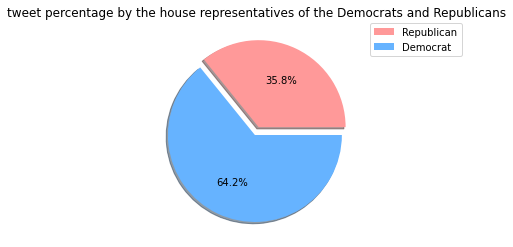

In [110]:
df = pd.read_csv('data_preprocessed/1_tweet_per_party.csv')
df = df[1:]
df


# plot pie chart

# colors = ['#0000ff','#DE0100']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = df.plot(kind='pie', y='tweet count',
 colors=colors, autopct='%1.1f%%', 
 shadow=True, explode=[0.05, 0.05],
 title='tweet percentage by the house representatives of the Democrats and Republicans',
 legend=True, ylabel='',labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', labels=df.username)
plt.show()


Time Series Analysis of Tweeter Usage by the House of Representative of the Democrat and Republican Party